As a new appointed data analyst of a bike sharing company, we conduct exploratoty data analysis to get a better understanding of our company.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bike_data = pd.read_csv('hour.csv', sep = ",", header = 0)
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Loaded data contains information, about the date, time, season of the year, holidays, weekdays and weekends,
the weather and the most important information is the final three columns. The casual representing the number of people which used the companies bikes in the hour, registered represents the number of registered users, and the count column is the total number of users per hour. (count = casual + registered)
The temp, humidity, and windspeed is normalized to be between 0 and 1, with 1 being the highest and 0 the lowest.

Examining casual and registered columns the following trends are identified.
    i). There are more registered users than casual ones in most hours. This could mean the business is good at convincing users to register, or the causal process is not easier hence many opt to register or more different scenarios.
    ii). There are peak hours for casual users while the registered users are a a bit more distributed during the day even at 1 AM


In [4]:
print(bike_data['count'].mean())
print("The standard deviation is: ", bike_data['count'].std())
print("The highest number of total users in an hour is: ", bike_data['count'].max())
print("The hourly record of registered users is: ", bike_data['registered'].max())
print("The lowest record of registered users in an hour is: ", bike_data['registered'].min())

189.46308763450142
The standard deviation is:  181.38759909186527
The highest number of total users in an hour is:  977
The hourly record of registered users is:  886
The lowest record of registered users in an hour is:  0


In [5]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The total average number of users per hour is 189, the average users per hour for registered and casual users per hour is 35 and 153 respectively
The minimum users recorded in an hour is 0, the highest record number is 977 for the total, and 886 and 367 for the registered and casual users respectively
25% of the hours in our dataset had a total of 40 users or lower
50% of the hours in our dataset had a total of 142 users or lower.
75% of the hours in our dataset had a total of 281 users or lower.
There is a wide variation in the hourly count of users. 25% of hours have less or equal to 40 users, we want more numbers closer to the highest record of users.

On further exploring our data, there are differences in the number of users at night and day time. Let's deep further on this categories.

In [7]:
print("An average of ", bike_data.loc[(bike_data['hr'] < 6), 'count'].mean(), "users are in in between midnight and 6 AM")
print("The highest total count record of users between midnight and 6 AM is: ", bike_data.loc[(bike_data['hr'] < 6), 'count'].max())
print("The lowest total count record of users between midnight and 6 AM is: ", bike_data.loc[(bike_data['hr'] < 6), 'count'].min())

An average of  24.908559401309635 users are in in between midnight and 6 AM
The highest total count record of users between midnight and 6 AM is:  283
The lowest total count record of users between midnight and 6 AM is:  1


Further Insight on the the midnight to 6 AM users

In [18]:
#Cold vs warm morning insights
print("Cold early Morning users: ", int(bike_data.loc[(bike_data['hr'] < 6) & ((bike_data['temp'] < 0.5) | (bike_data['hum'] <0.5)), 'count'].mean()))
print("Warm early Morning users: ", int(bike_data.loc[(bike_data['hr'] < 6) & ((bike_data['temp'] > 0.5) | (bike_data['hum'] > 0.5)), 'count'].mean()))

Cold early Morning users:  19
Warm early Morning users:  25


More users on warm mornings in comparison to cold mornings.
Lets analyse users on hours > 1900

In [13]:
print("An average of ", int(bike_data.loc[bike_data['hr'] > 19, 'count'].mean()), " users are between 1900 hrs and midnight")
print("The highest record of users between 1900 hrs and midnight is: ", bike_data.loc[bike_data['hr'] > 19, 'count'].max())
print("The lowest record of users between 1900 hrs and midnight is: ", bike_data.loc[bike_data['hr'] > 19, 'count'].min())

An average of  154  users are between 1900 hrs and midnight
The highest record of users between 1900 hrs and midnight is:  584
The lowest record of users between 1900 hrs and midnight is:  2


In [17]:
print("An average of ", int(bike_data.loc[((bike_data['hr'] > 5) & (bike_data['hr'] < 19)), 'count'].mean()), " users are between 0600 hrs and 1900 hrs")
print("The highest record of users between 6 AM and 7 PM is: ", int(bike_data.loc[((bike_data['hr'] > 5) & (bike_data['hr'] < 19)), 'count'].max()))
print("The lowest record of users between 6 AM and 7 PM is: ", int(bike_data.loc[((bike_data['hr'] > 5) & (bike_data['hr'] < 19)), 'count'].min()))

An average of  265  users are between 0600 hrs and 1900 hrs
The highest record of users between 6 AM and 7 PM is:  977
The lowest record of users between 6 AM and 7 PM is:  1


The average number of users per hour during the day is higher than the day. The business can offer discounts at night to increase the number or reduce prices and more. 
The year has four seasons around the year. A study on the different behaviors follows. Once again, our aim as the data analyst team is to understand the business better and influence decision making.
The seasons are represented as follows.
1 - Winter
2 - Spring
3 - Summer
4 - Fall

In [20]:
season_data = bike_data[['season', 'count']].groupby('season').mean()
season_data

,count
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


The winter season has the lowest average record per hour, a trend noted also on cold mornings. Summer holds the highest record, with Spring coming in second at 208, and the Fall season coming in 3rd. 
How is the business performing during holidays?
0 - non holiday
1 - holiday

In [24]:
holiday_data = bike_data[['holiday', 'casual', 'registered', 'count']].groupby('holiday').mean()
holiday_data

,casual,registered,count
holiday,,,
0,35.408377,155.020203,190.42858
1,44.718000,112.152000,156.87000


More casual users per hour during holidays, Less registered users borrow the bikes during holiday in comparison to non-holidays.
How is the borrowing rate during holidays and non holidays over the 4 seasons?

In [30]:
season_holiday_data = bike_data[['season', 'holiday', 'casual', 'registered', 'count']].groupby(['holiday', 'season']).mean()
season_holiday_data

casual  registered       count
holiday season                                   
0       1       14.339627   98.346248  112.685875
        2       45.809413  162.619059  208.428472
        3       49.377955  186.598864  235.976818
        4       30.416341  169.549658  199.965998
1       1       13.079268   58.963415   72.042683
        2       61.937500  142.614583  204.552083
        3       91.958333  145.864583  237.822917
        4       37.777778  129.944444  167.722222

Text(0.5, 1.0, 'Total Count by hour')

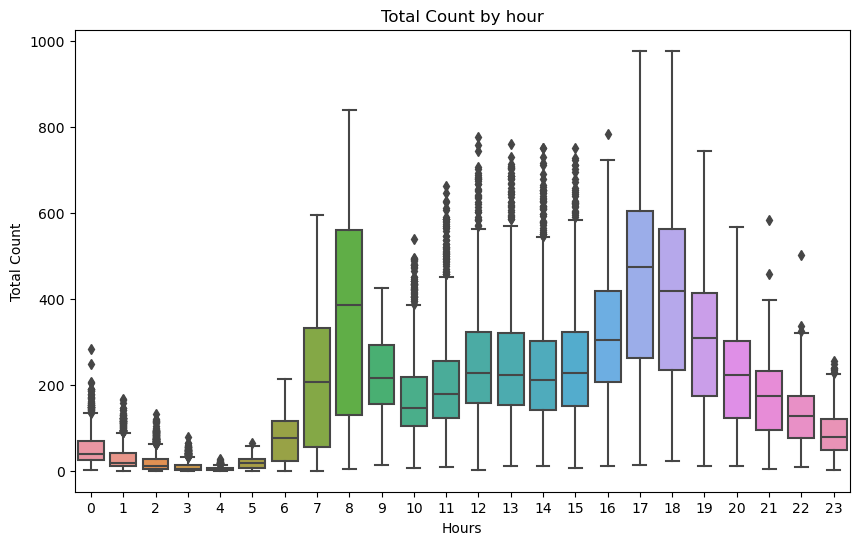

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x  = 'hr', y = 'count', data = bike_data)
plt.ylabel("Total Count")
plt.xlabel("Hours")
plt.title("Total Count by hour")